# NYC Yellow Taxi Trip Visualization

In [1]:
# imports
import pandas as pd
from datetime import date
# turn off truncating display option
pd.set_option('display.max_columns', None)
import numpy as np

### Libs for viszalization
import matplotlib#
import matplotlib.pyplot as plt#

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

import geopandas as gpd

In [12]:
# to free up memory space
%reset -f

## How do number of trips distribute over the month, day and hour?

In [2]:
df_number_trips = pd.read_parquet("NYC_trips_count_data.parquet")

In [17]:
df_number_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8607976 entries, 0 to 8953428
Data columns (total 4 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tpep_pickup_datetime  datetime64[ns]
 1   month                 object        
 2   day                   object        
 3   hour                  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 328.4+ MB


In [18]:
df_number_trips

tpep_pickup_datetime    month       day  hour
0        2022-01-01 00:35:40  January  Saturday     0
1        2022-01-01 00:33:43  January  Saturday     0
2        2022-01-01 00:53:21  January  Saturday     0
3        2022-01-01 00:25:21  January  Saturday     0
4        2022-01-01 00:36:48  January  Saturday     0
...                      ...      ...       ...   ...
8953424  2022-03-31 23:10:50    March  Thursday    23
8953425  2022-03-31 23:06:29    March  Thursday    23
8953426  2022-03-31 23:33:04    March  Thursday    23
8953427  2022-03-31 23:03:08    March  Thursday    23
8953428  2022-03-31 23:31:48    March  Thursday    23

[8607976 rows x 4 columns]

### Trips per Month

In [15]:
df_month = df_number_trips.month.value_counts()
df_month = df_month.reset_index()
df_month.rename(columns={'index': 'month', 'month': 'count'}, inplace=True)
df_month = df_month.reindex([2, 1, 0])

In [21]:
df_month

month    count
2   January  2344675
1  February  2823546
0     March  3439755

In [9]:
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Trips per Month')

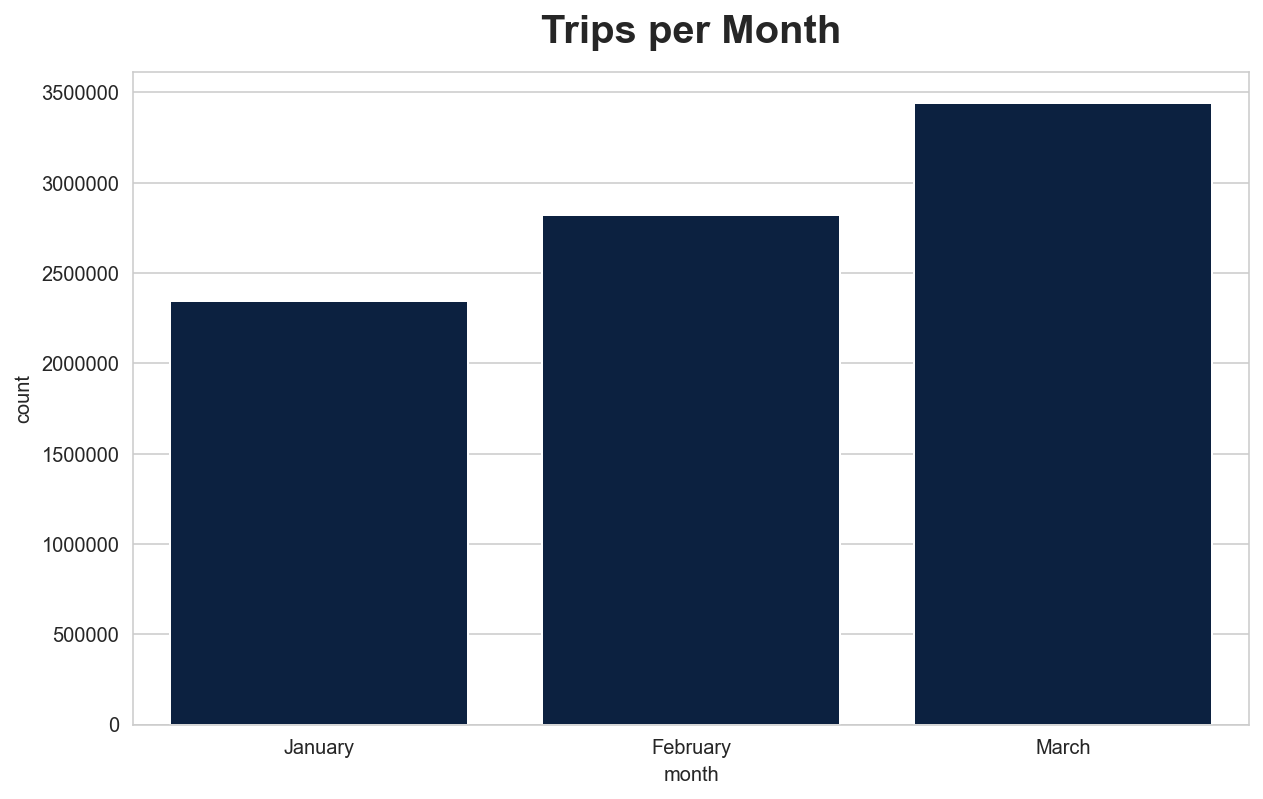

In [18]:

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_month, x='month', y='count', color='#032049', ax=ax)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Trips per Month', size=20,fontweight="bold", pad=15)

### Trips per Day

In [20]:
df_day = df_number_trips.day.value_counts()
df_day = df_day.reset_index()
df_day.rename(columns={'index': 'dayofweek', 'day': 'count'}, inplace=True)
df_day = df_day.reindex([5, 4, 1, 0, 2, 3, 6])

In [5]:
d0 = date(2022, 1, 1)
d1 = date(2022, 3, 31)
delta = d1 - d0
print(delta.days)

89


In [22]:
df_day['average'] = df_day['count'] / delta.days

In [23]:
df_day

dayofweek    count       average
5     Monday  1113974  12516.561798
4    Tuesday  1250646  14052.202247
1  Wednesday  1302864  14638.921348
0   Thursday  1358186  15260.516854
2     Friday  1264150  14203.932584
3   Saturday  1257892  14133.617978
6     Sunday  1060264  11913.078652

Text(0, 0.5, 'Average count of Taxi trips')

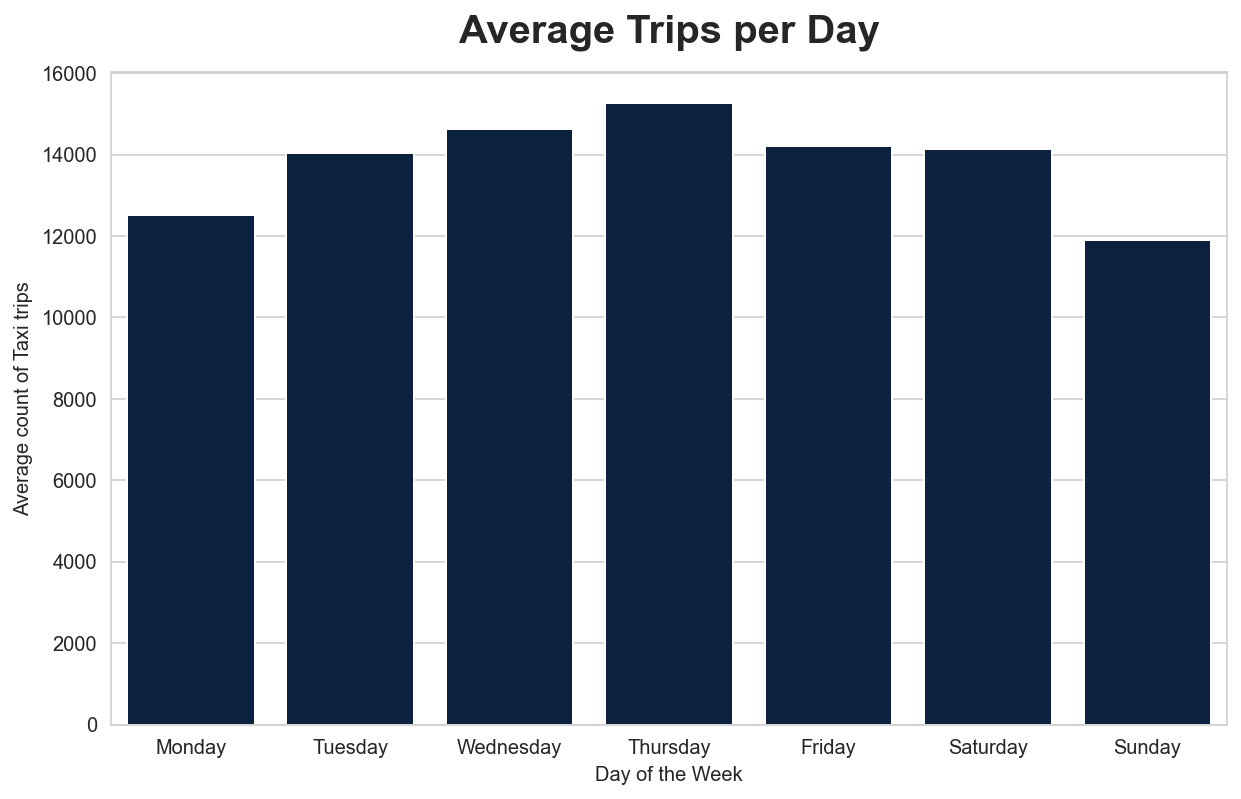

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=df_day.dayofweek, y=df_day['average'], ax= ax, color='#032049')
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Average Trips per Day', size=20,fontweight="bold", pad=15)
plt.xlabel("Day of the Week")
plt.ylabel("Average count of Taxi trips")

### Trips per Hour

In [3]:
df_hour = df_number_trips.hour.value_counts().sort_index()
df_hour = df_hour.reset_index()
df_hour.rename(columns={'index': 'hour', 'hour':'count'}, inplace=True)

In [6]:
df_hour['average'] = df_hour['count'] / delta.days

In [7]:
df_hour

hour   count      average
0      0  215981  2426.752809
1      1  144588  1624.584270
2      2   96042  1079.123596
3      3   66162   743.393258
4      4   41669   468.191011
5      5   46480   522.247191
6      6  125733  1412.730337
7      7  252538  2837.505618
8      8  340853  3829.808989
9      9  374535  4208.258427
10    10  409181  4597.539326
11    11  440256  4946.696629
12    12  480374  5397.460674
13    13  497419  5588.977528
14    14  542240  6092.584270
15    15  567671  6378.325843
16    16  562292  6317.887640
17    17  608887  6841.426966
18    18  634538  7129.640449
19    19  559195  6283.089888
20    20  457673  5142.393258
21    21  431991  4853.831461
22    22  400985  4505.449438
23    23  310693  3490.932584

Text(0, 0.5, 'Average count of Taxi trips')

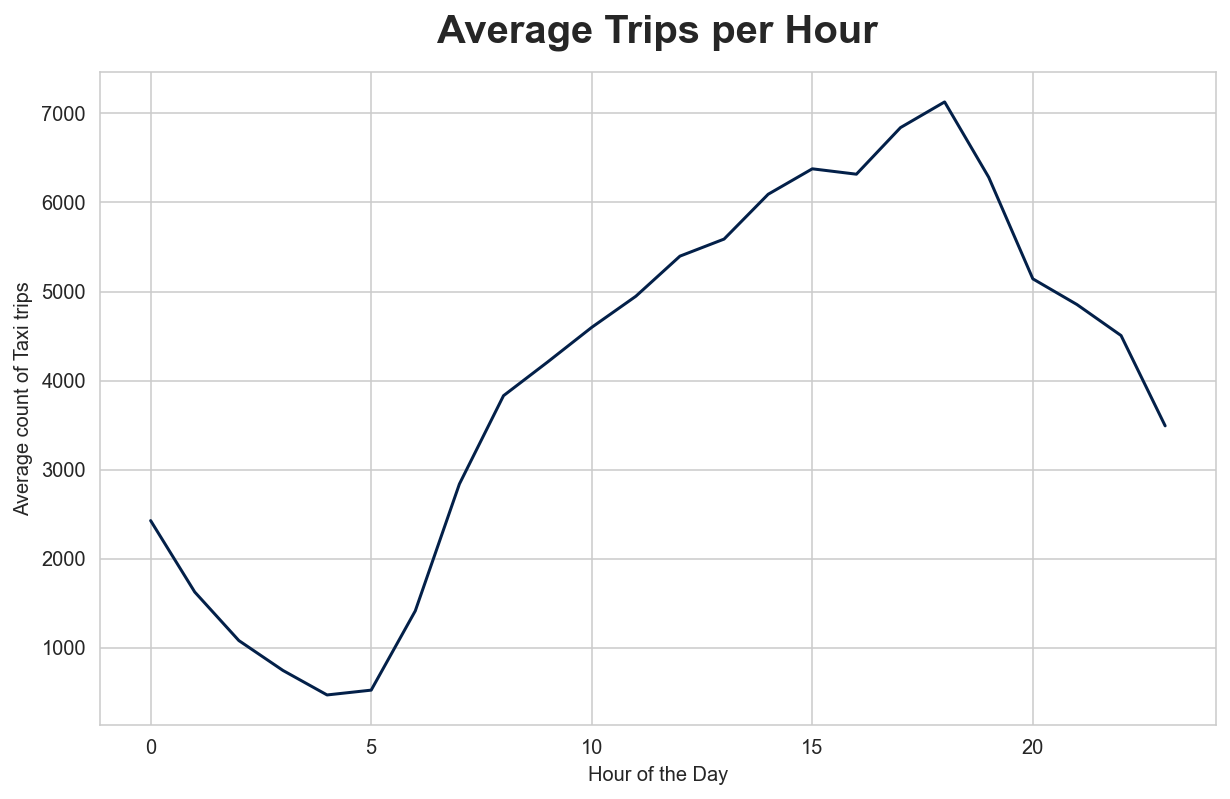

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=df_hour['hour'], y=df_hour['average'], ax=ax, color='#032049')
ax.set_title('Average Trips per Hour', size=20,fontweight="bold", pad=15)
plt.xlabel("Hour of the Day")
plt.ylabel("Average count of Taxi trips")

## What is the most common pickup and dropoff location?

In [3]:
df_common_locations = gpd.read_file("common_locations_shape/NYC_common_locations_data.shp")

In [57]:
df_common_locations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    255 non-null    int64   
 1   Shape_Leng  255 non-null    float64 
 2   Shape_Area  255 non-null    float64 
 3   zone        255 non-null    object  
 4   LocationID  255 non-null    int64   
 5   borough     255 non-null    object  
 6   PULocation  255 non-null    int64   
 7   PU_count    255 non-null    int64   
 8   DOLocation  255 non-null    int64   
 9   DO_count    255 non-null    int64   
 10  geometry    255 non-null    geometry
dtypes: float64(2), geometry(1), int64(6), object(2)
memory usage: 22.0+ KB


#### Function for static plots

In [72]:
def find_vmin_vmax(borough):
    pu_vmin = df_common_locations[df_common_locations.borough == borough]['PU_count'].min()
    pu_vmax = df_common_locations[df_common_locations.borough == borough]['PU_count'].max()

    do_vmin = df_common_locations[df_common_locations.borough == borough]['DO_count'].min()
    do_vmax = df_common_locations[df_common_locations.borough == borough]['DO_count'].max()

    vmin = pu_vmin if pu_vmin < do_vmin else do_vmin
    vmax = pu_vmax if pu_vmax > do_vmax else do_vmax

    return vmin, vmax

In [145]:
# Function for static plots
def plot_static(borough, width, hight):    
    vmin, vmax = find_vmin_vmax(borough)
    #vmin = 0

    fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(width,hight))
    axis1 = df_common_locations[df_common_locations.borough == borough].plot(column="PU_count", cmap='cividis', linewidth=0.8, ax=axis1, edgecolor='0.8')
    axis2 = df_common_locations[df_common_locations.borough == borough].plot(column="DO_count", cmap='cividis', linewidth=0.8, ax=axis2, edgecolor='0.8')

    axis1.axis('off')
    axis2.axis('off')
    axis1.set_title(f'Pickup locations in {borough}', fontdict={'fontsize': '20'})
    axis2.set_title(f'Dropoff locations in {borough}', fontdict={'fontsize': '20'})

    sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    fig.tight_layout()

### New York

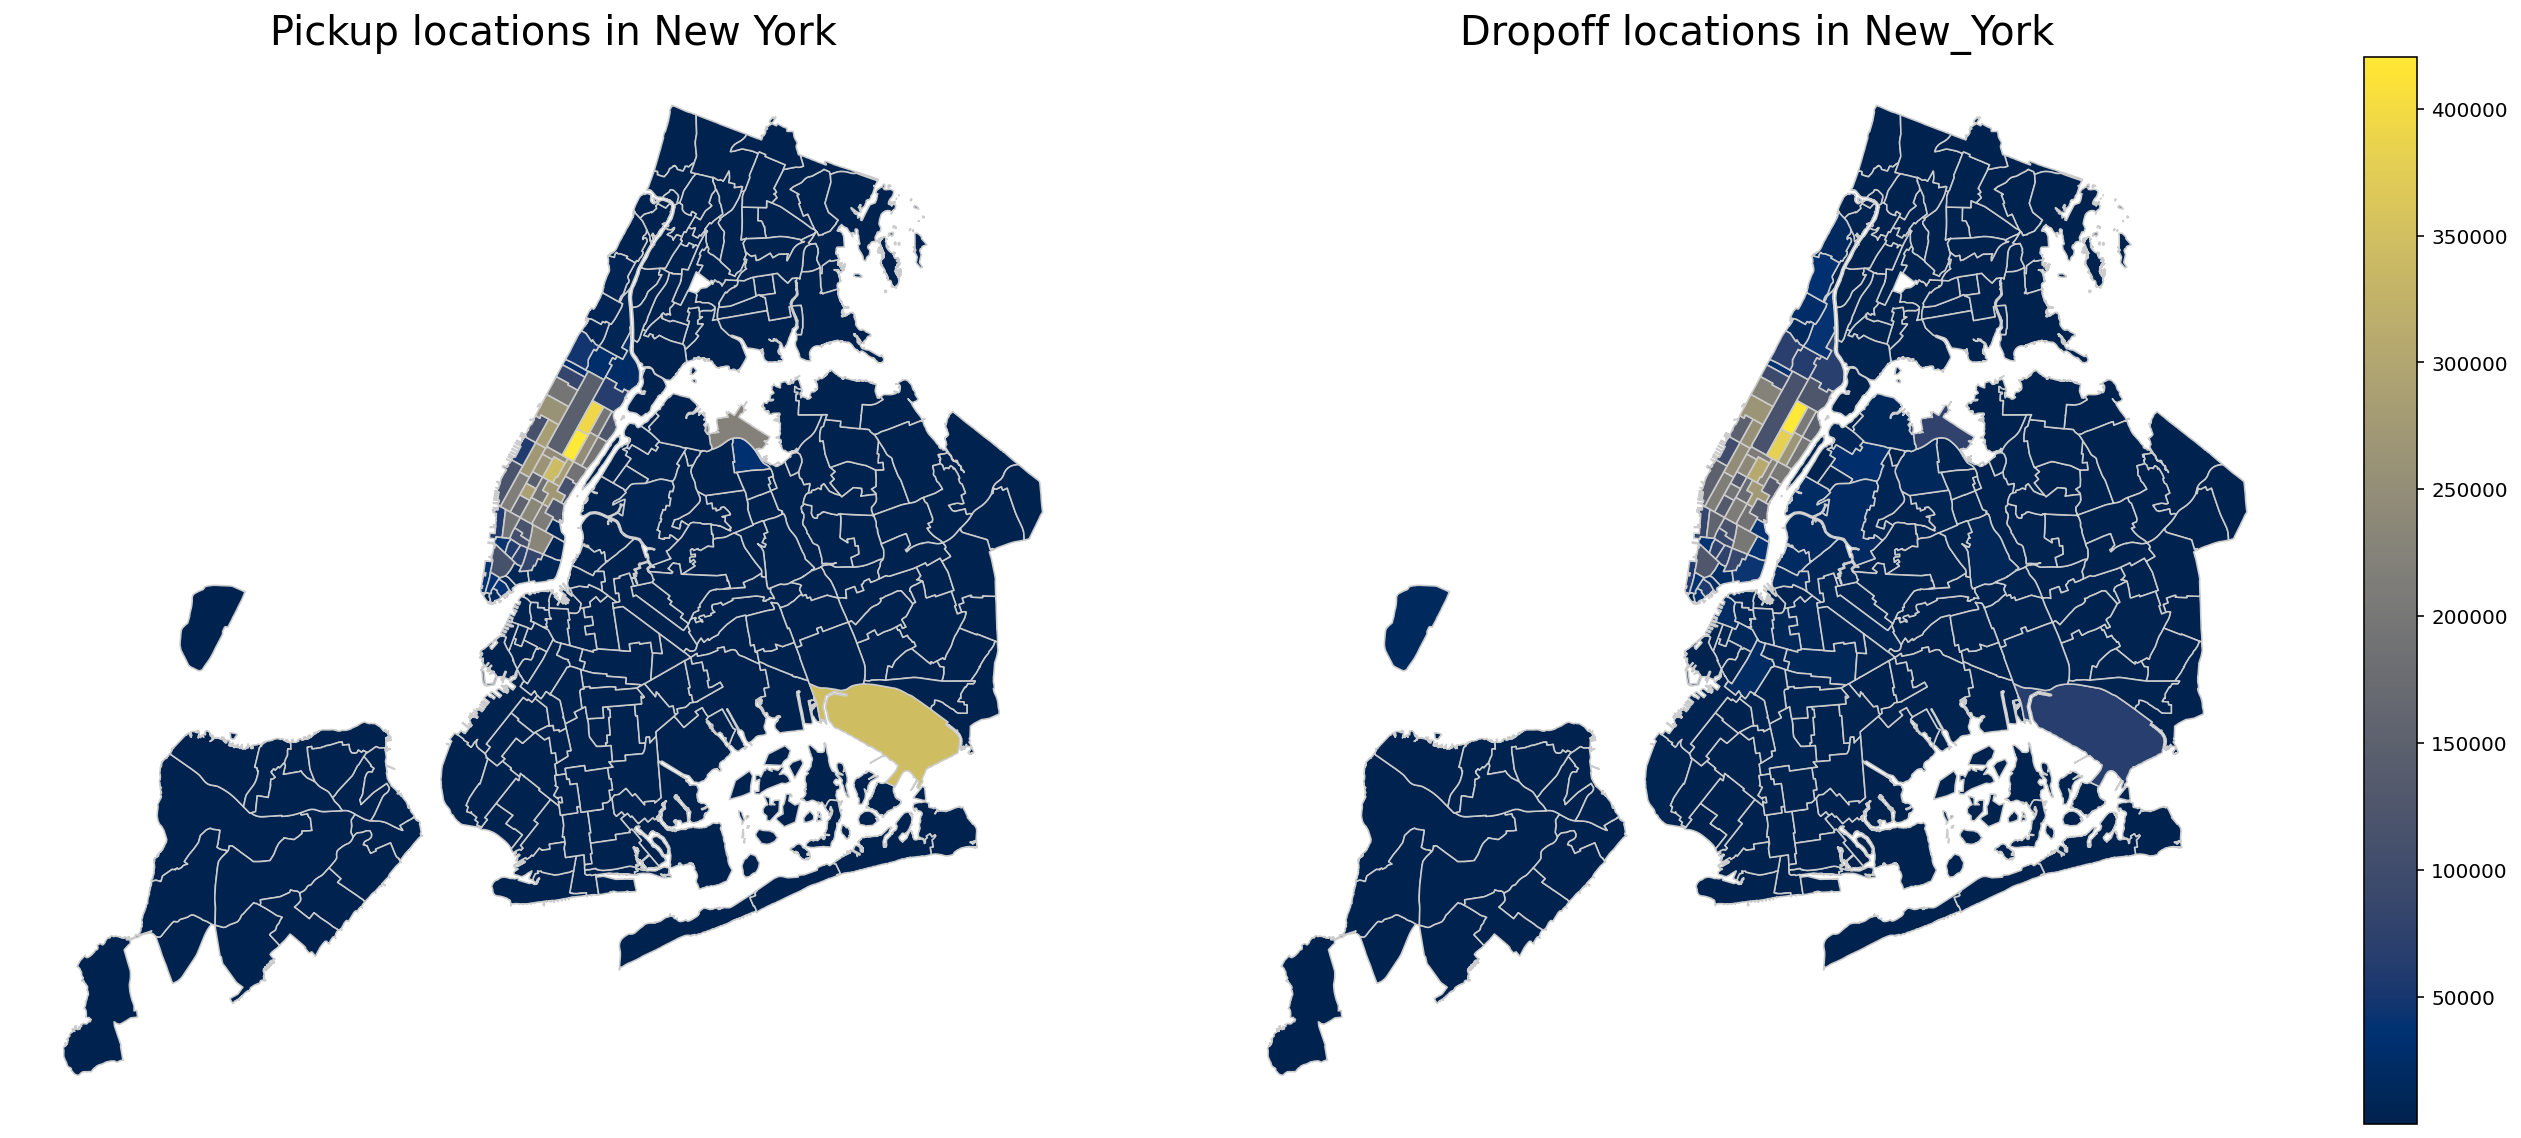

In [152]:
pu_vmin = df_common_locations['PU_count'].min()
pu_vmax = df_common_locations['PU_count'].max()

do_vmin = df_common_locations['DO_count'].min()
do_vmax = df_common_locations['DO_count'].max()

vmin = pu_vmin if pu_vmin < do_vmin else do_vmin
#vmin = 0
vmax = pu_vmax if pu_vmax > do_vmax else do_vmax


fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(19,8))
axis1 = df_common_locations.plot(column="PU_count", cmap='cividis', linewidth=0.8, ax=axis1, edgecolor='0.8')
axis2 = df_common_locations.plot(column="DO_count", cmap='cividis', linewidth=0.8, ax=axis2, edgecolor='0.8')

axis1.axis('off')
axis2.axis('off')
axis1.set_title(f'Pickup locations in New York', fontdict={'fontsize': '20'})
axis2.set_title(f'Dropoff locations in New_York', fontdict={'fontsize': '20'})

sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.tight_layout()

In [4]:
df_PU = df_common_locations.groupby('borough').sum()['PU_count']
df_PU = df_PU.reset_index()

In [5]:
df_DO = df_common_locations.groupby('borough').sum()['DO_count']
df_DO = df_DO.reset_index()

In [6]:
df_PU['flag'] = 'Pickup'
df_PU.rename(columns={'PU_count': 'count'}, inplace=True)
df_DO['flag'] = 'Dropoff'
df_DO.rename(columns={'DO_count': 'count'}, inplace=True)

In [7]:
df_PU_DO = pd.concat([df_PU, df_DO], axis=0)

In [27]:
df_PU_DO

borough    count     flag
0          Bronx     8178   Pickup
1       Brooklyn    37578   Pickup
2            EWR      104   Pickup
3      Manhattan  7842078   Pickup
4         Queens   639693   Pickup
5  Staten Island      351   Pickup
0          Bronx    50088  Dropoff
1       Brooklyn   307635  Dropoff
2            EWR    14543  Dropoff
3      Manhattan  7793411  Dropoff
4         Queens   367022  Dropoff
5  Staten Island     1633  Dropoff

In [8]:
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Count of Pickup and Dropoff for each Borough')

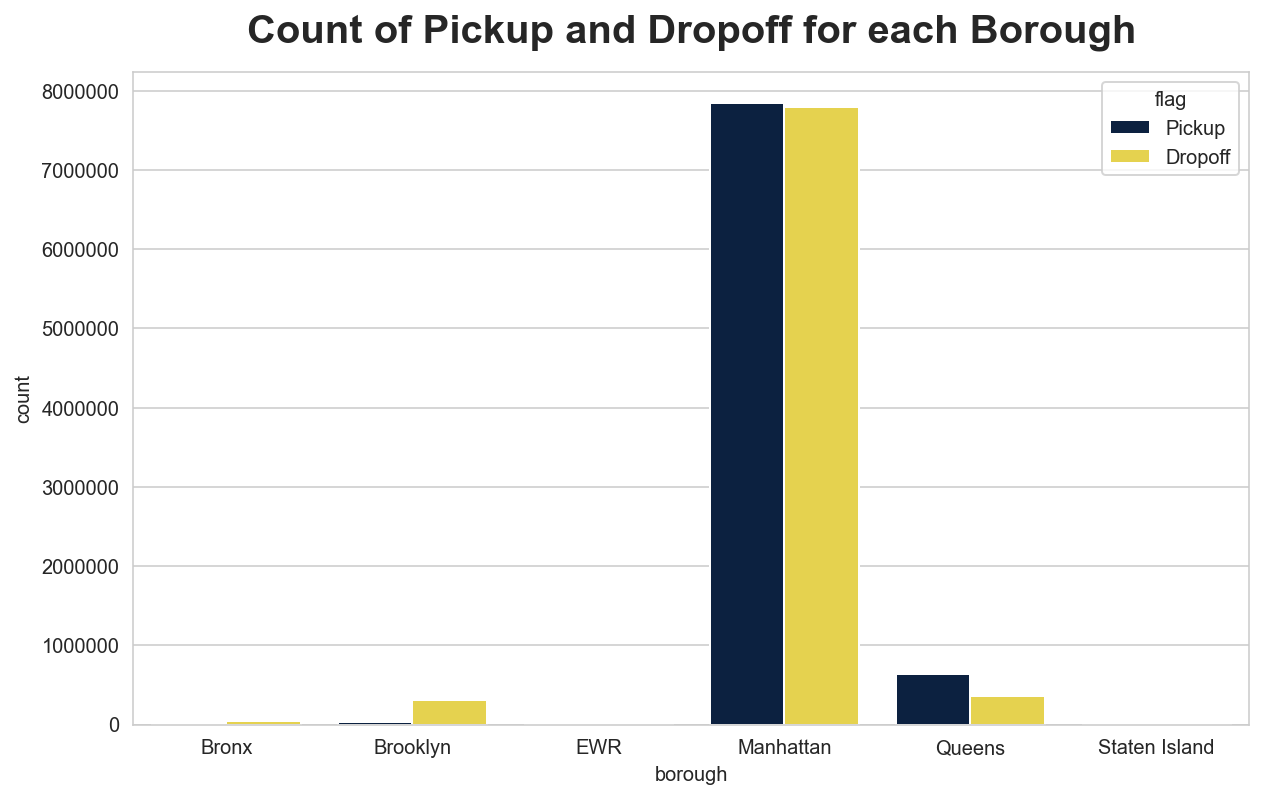

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

palette = {'Pickup': '#032049', 'Dropoff': '#FEE536'}

sns.barplot(x="borough", y="count", hue="flag", data=df_PU_DO, ax=ax, palette=palette)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Count of Pickup and Dropoff for each Borough', size=20,fontweight="bold", pad=15)

Most common places for yellow Taxis to pickup and dropoff is Manhattan. But it too top level. Let's explore each borough.

### Manhattan

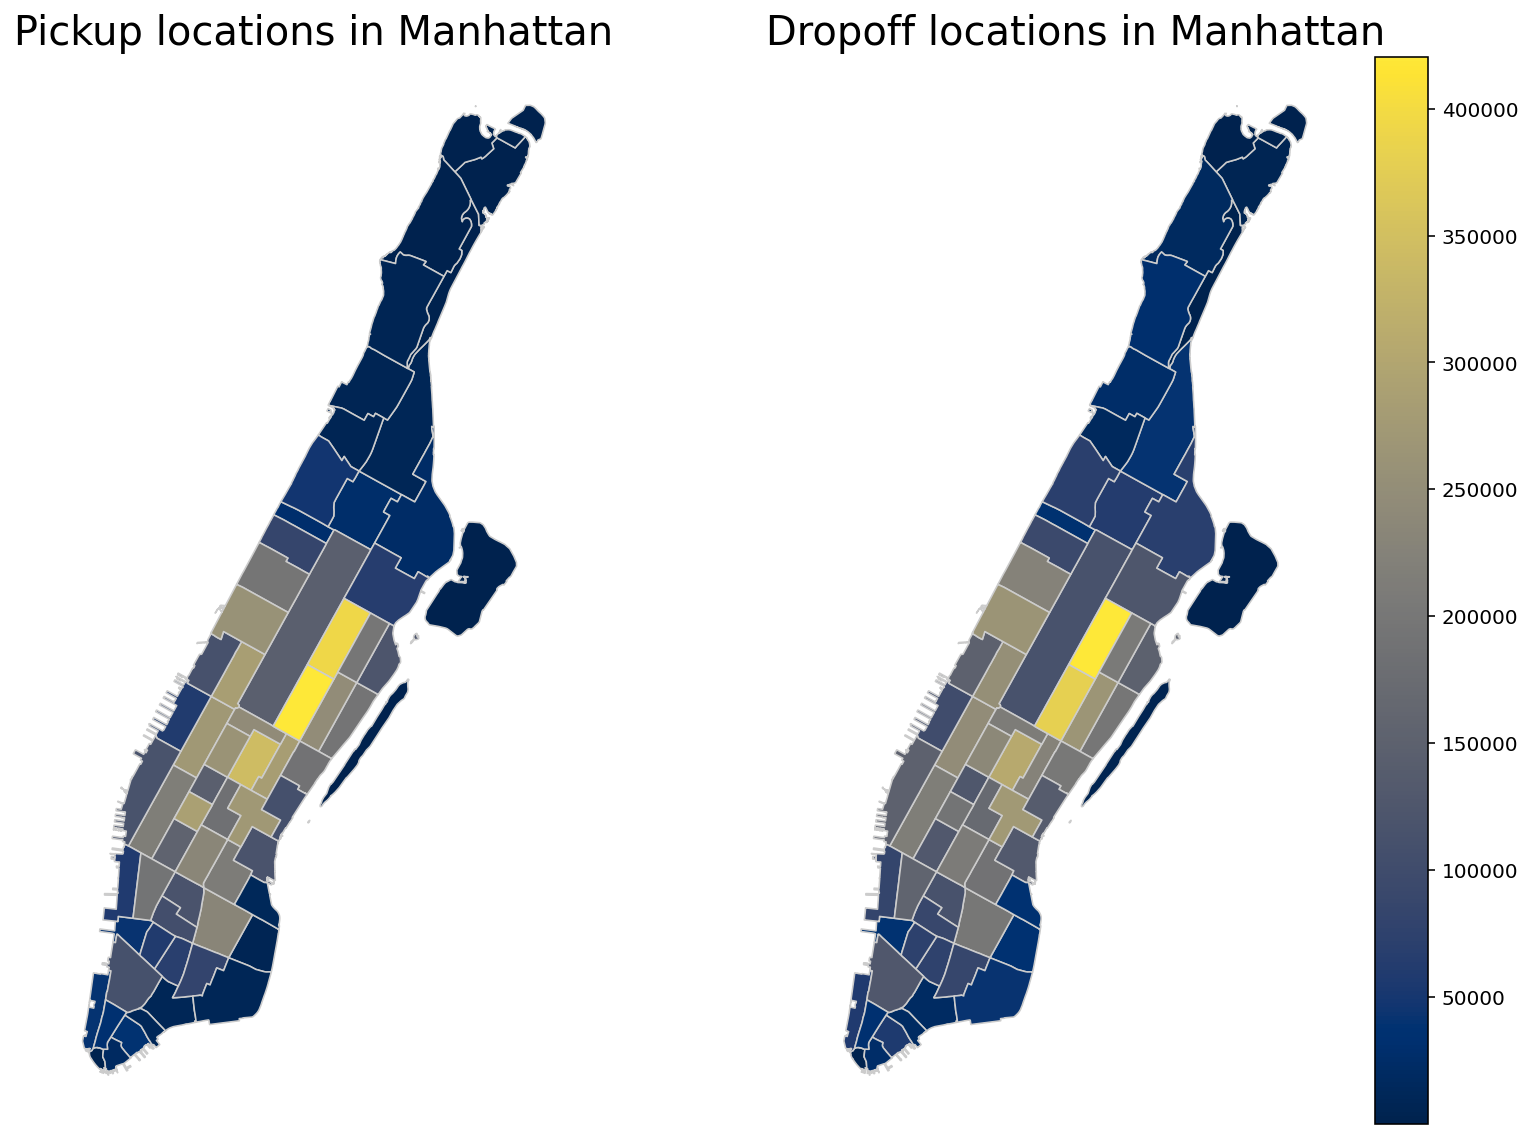

In [107]:
plot_static("Manhattan", 12, 8)

In [62]:
df_common_locations[df_common_locations.borough == 'Manhattan'].sort_values('PU_count', ascending=False)[['PULocation', 'zone', 'PU_count']]

PULocation                          zone  PU_count
228         237         Upper East Side South    420479
227         236         Upper East Side North    393963
154         161                Midtown Center    344740
179         186  Penn Station/Madison Sq West    289044
135         142           Lincoln Square East    285260
..          ...                           ...       ...
187         194               Randalls Island       224
194         202              Roosevelt Island       168
146         153                   Marble Hill        79
121         128              Inwood Hill Park        25
113         120               Highbridge Park        23

[66 rows x 3 columns]

In [63]:
df_common_locations[df_common_locations.borough == 'Manhattan'].sort_values('DO_count', ascending=False)[['DOLocation', 'zone', 'DO_count']]

DOLocation                   zone  DO_count
227         236  Upper East Side North    405738
228         237  Upper East Side South    366407
154         161         Midtown Center    296572
163         170            Murray Hill    263239
134         141        Lenox Hill West    255824
..          ...                    ...       ...
11           12           Battery Park      3454
187         194        Randalls Island       710
121         128       Inwood Hill Park       475
146         153            Marble Hill       379
113         120        Highbridge Park       363

[66 rows x 3 columns]

No significant difference betwween pickup and dropoff zones

### Queens

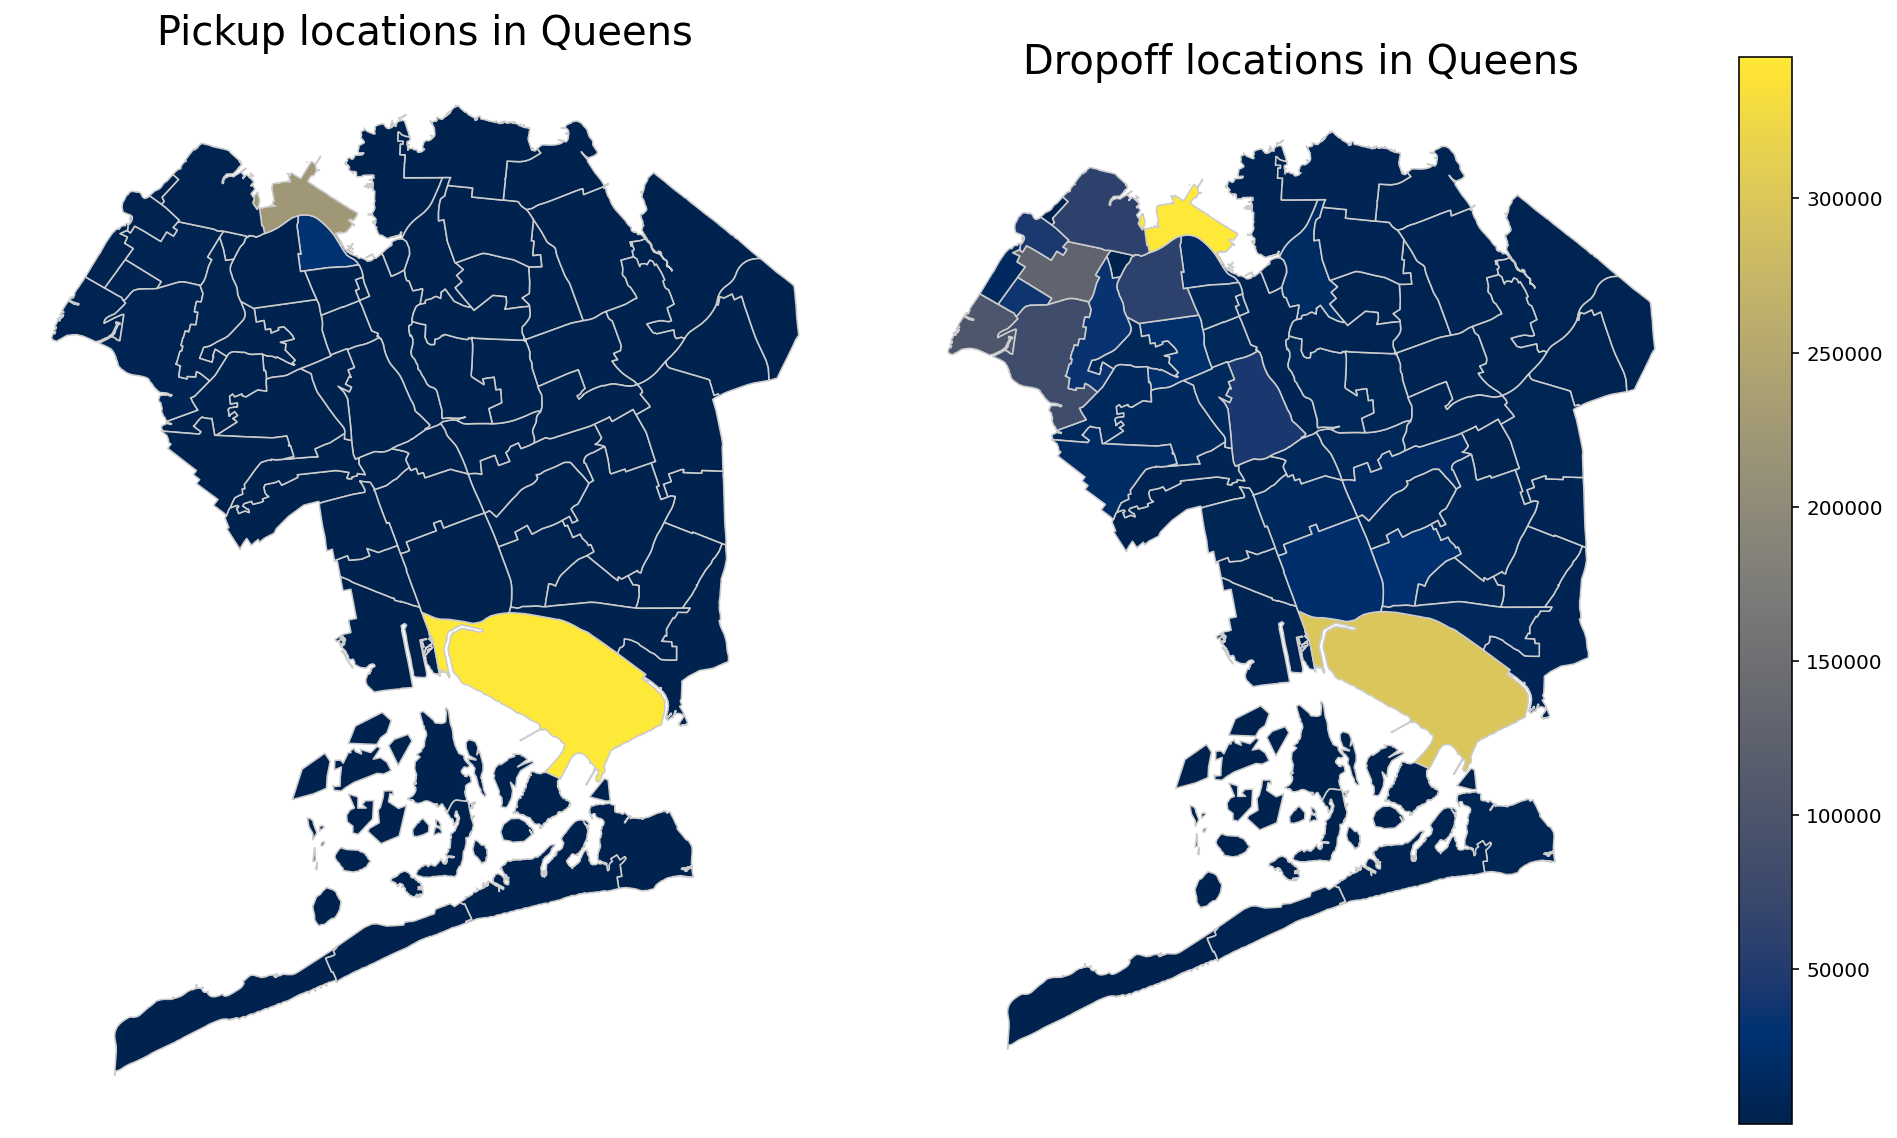

In [134]:
plot_static("Queens", 14, 8)

In [64]:
df_common_locations[df_common_locations.borough == 'Queens'].sort_values('PU_count', ascending=False)[['PULocation', 'zone', 'PU_count']]

PULocation                                 zone  PU_count
125         132                          JFK Airport    345873
131         138                    LaGuardia Airport    222910
68           70                        East Elmhurst     31925
217         226                            Sunnyside      6572
139         146        Long Island City/Queens Plaza      4557
..          ...                                  ...       ...
244         253                        Willets Point         9
93           96            Forest Park/Highland Park         6
1             2                          Jamaica Bay         6
26           27  Breezy Point/Fort Tilden/Riis Beach         2
29           30                        Broad Channel         2

[69 rows x 3 columns]

In [65]:
df_common_locations[df_common_locations.borough == 'Queens'].sort_values('DO_count', ascending=False)[['DOLocation', 'zone', 'DO_count']]

DOLocation                                 zone  DO_count
131         138                    LaGuardia Airport     74888
125         132                          JFK Airport     64620
6             7                              Astoria     28005
138         145       Long Island City/Hunters Point     22174
217         226                            Sunnyside     17621
..          ...                                  ...       ...
198         207     Saint Michaels Cemetery/Woodside       159
26           27  Breezy Point/Fort Tilden/Riis Beach       117
244         253                        Willets Point        95
29           30                        Broad Channel        48
1             2                          Jamaica Bay         6

[69 rows x 3 columns]

- Most Pickups at the two airports in Quees: JFK and LGA
- more pickups from JFK then LGA
- a bit more dropoff at LGA then JFK

### Bronx

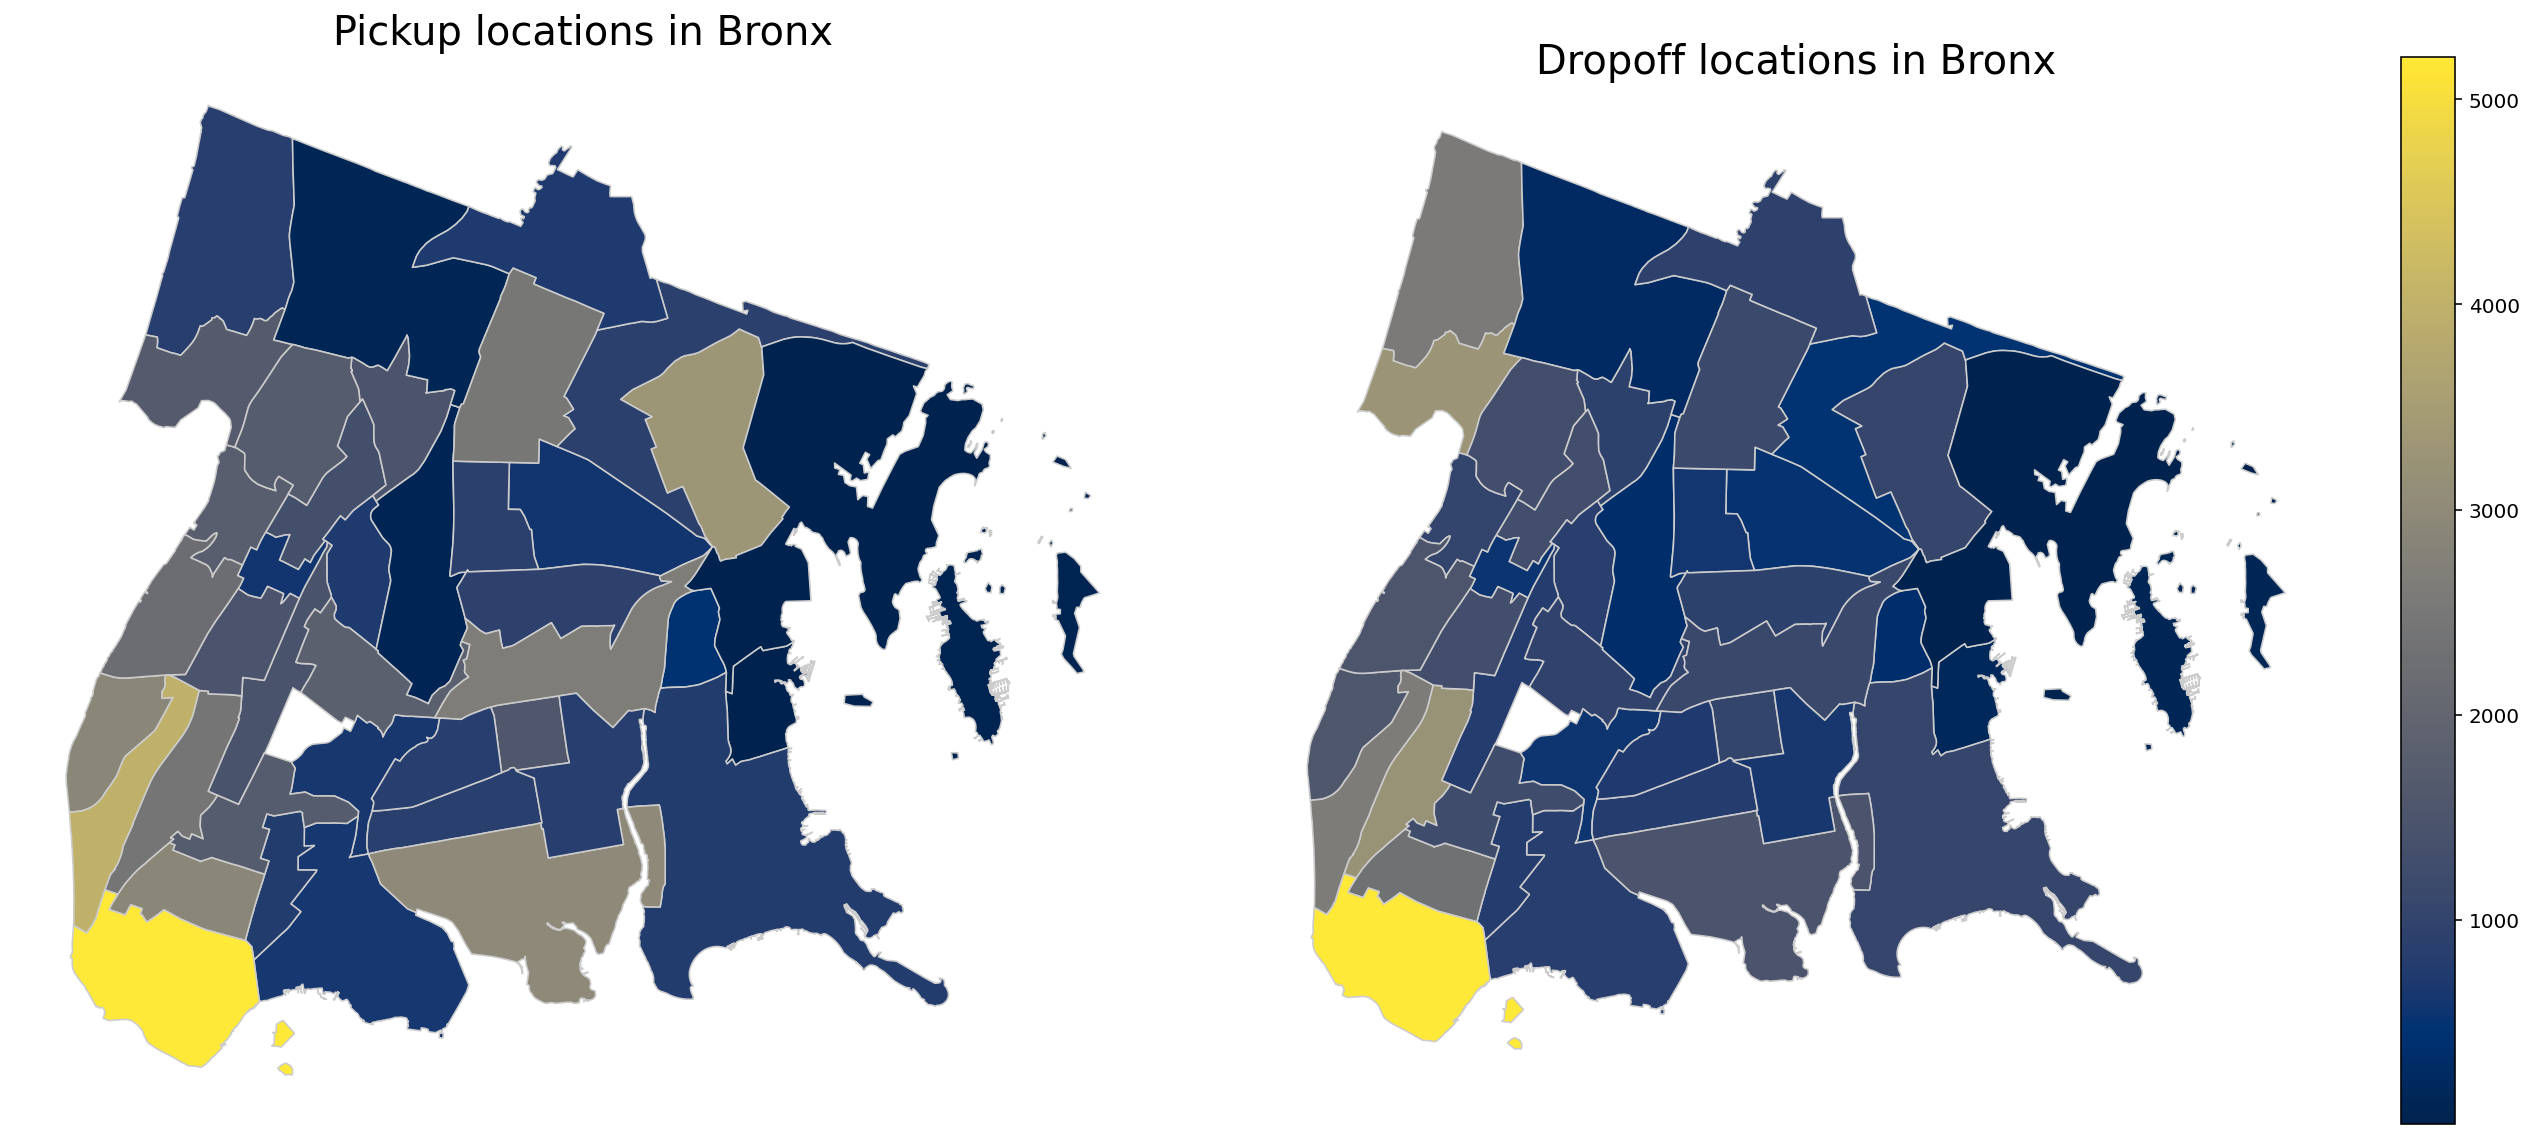

In [133]:
plot_static("Bronx", 19, 8)

### Staten Island

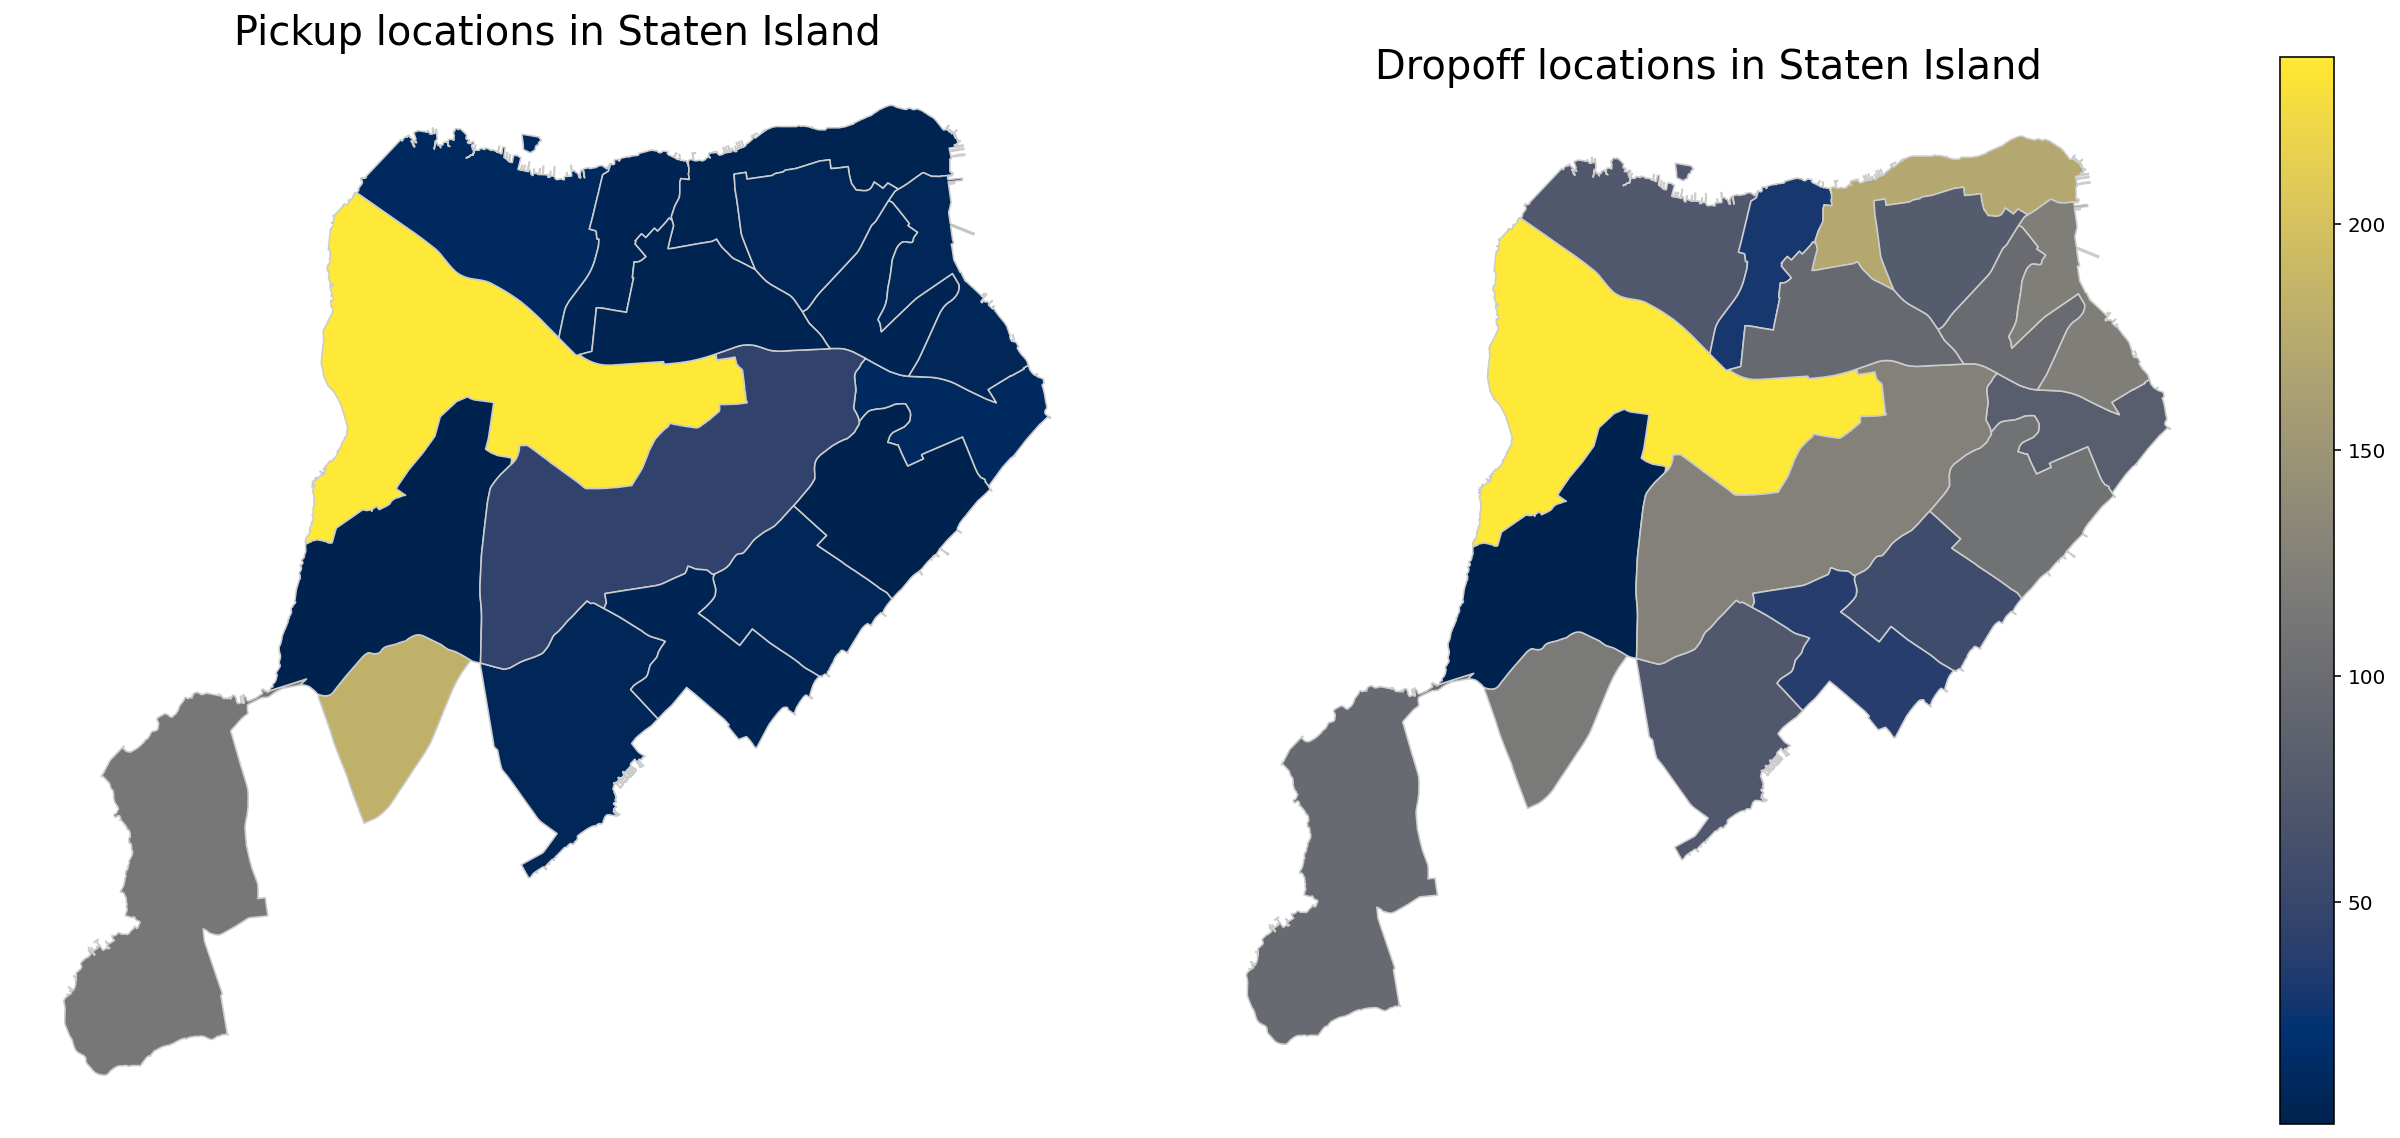

In [136]:
plot_static("Staten Island", 18, 8)

### Brooklyn

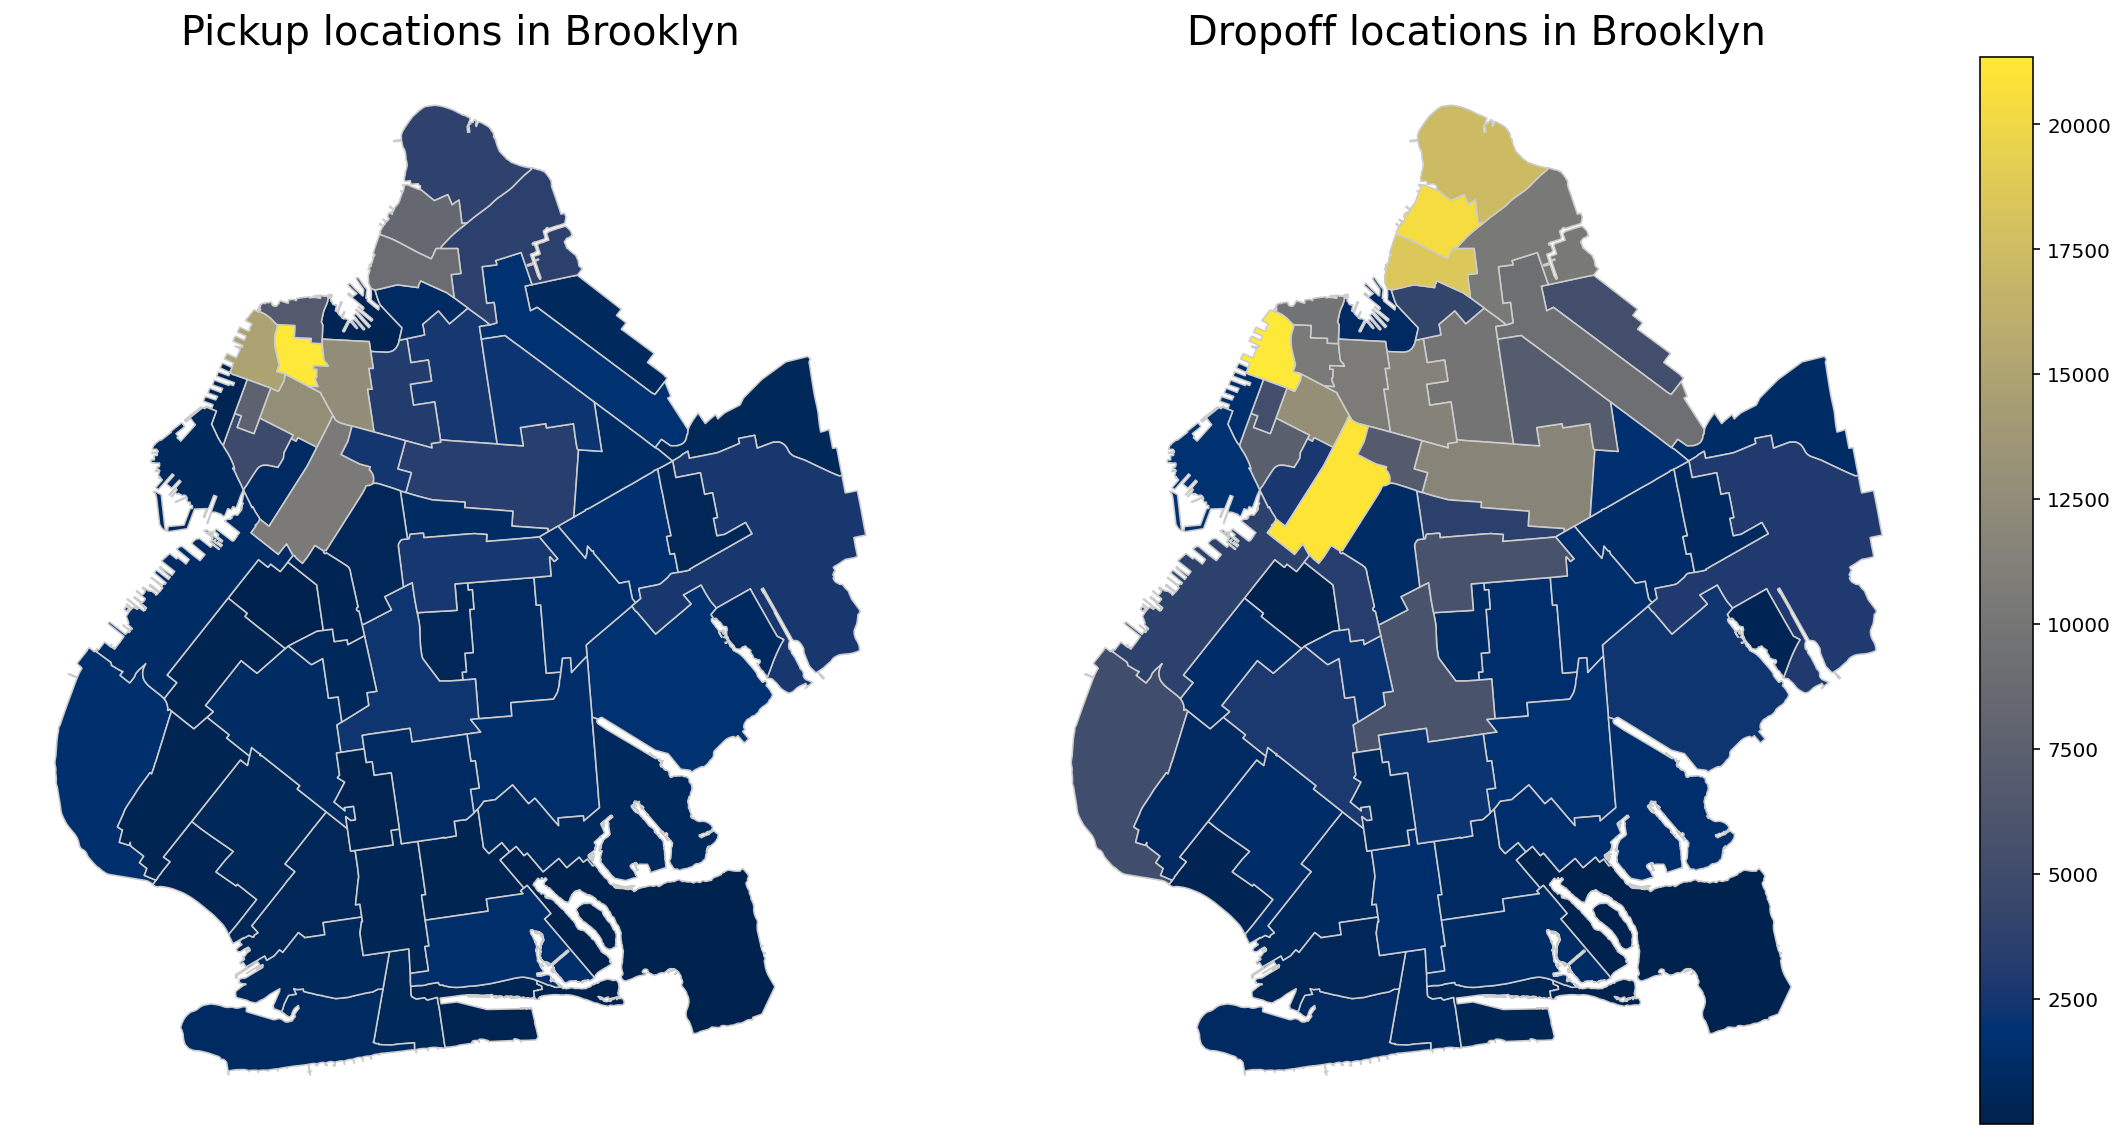

In [126]:
plot_static("Brooklyn", 16, 8)

## What are the most traveled location from the aiports?

In [22]:
df_airports = pd.read_parquet("NYC_airports_data.parquet")

# read shapefile
fp = "taxi_zones/taxi_zones.shp"
map_df = gpd.read_file(fp)

In [23]:
df_airports_PU = df_airports[(df_airports.PULocation_Zone == 'LaGuardia Airport') | (df_airports.PULocation_Zone == 'JFK Airport') | (df_airports.PULocation_Zone == 'Newark Airport')]

In [24]:
df_airports_PU.value_counts('PULocation_Zone')

PULocation_Zone
JFK Airport          345873
LaGuardia Airport    222910
Newark Airport          104
dtype: int64

In [25]:
df_airports_PU.DOLocation_Borough.value_counts()

Manhattan        334302
Queens           104205
Brooklyn          99766
Unknown           15053
Bronx             14080
EWR                 828
Staten Island       653
Name: DOLocation_Borough, dtype: int64

### John F. Kennedy International Airport (JFK)

In [27]:
df_PU_JFK = df_airports[df_airports.PULocation_Zone == "JFK Airport"]
df_PU_JFK = df_PU_JFK.DOLocationID.value_counts().sort_values(ascending=False)
df_PU_JFK = df_PU_JFK.reset_index()
df_PU_JFK.rename(columns={'index': 'LocationID', 'DOLocationID': 'count'}, inplace=True)
df_PU_JFK = map_df.merge(df_PU_JFK, left_on="LocationID", right_on="LocationID")
df_PU_JFK

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
252       259    0.126750    0.000395       Woodlawn/Wakefield         259   
253       260    0.133514    0.000422                 Woodside         260   
254       261    0.027120    0.000034       World Trade Center         261   
255       262    0.049064    0.000122           Yorkville East         262   
256       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  count  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...    541  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...      4  
2            Bronx  POLYGON ((1026308.770 256767.698, 1026495.593 ...    159  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   1104  
4    Staten Island  POLYGON ((935843.310 144283.336, 936046.565 14...      9  
..             ...                                                ...    ...  
252          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...    233  
253         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...    873  
254      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   1800  
255      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   3152  
256      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   3641  

[257 rows x 8 columns]

In [28]:
df_PU_JFK.sort_values(by='count', ascending=False)[['zone', 'borough', 'count']]

zone        borough  count
223         Times Sq/Theatre District      Manhattan  12651
47                       Clinton East      Manhattan  10085
158                     Midtown South      Manhattan   6996
164                       Murray Hill      Manhattan   6481
67                       East Chelsea      Manhattan   5993
..                                ...            ...    ...
200  Saint Michaels Cemetery/Woodside         Queens      9
58                       Crotona Park          Bronx      9
4                       Arden Heights  Staten Island      9
1                         Jamaica Bay         Queens      4
43             Charleston/Tottenville  Staten Island      4

[257 rows x 3 columns]

In [32]:
df_PU_JFK[df_PU_JFK.borough == 'Brooklyn'].sort_values('count', ascending=False)

OBJECTID  Shape_Leng  Shape_Area                             zone  \
175       181    0.089537    0.000307                       Park Slope   
60         61    0.117311    0.000511              Crown Heights North   
248       255    0.062384    0.000172        Williamsburg (North Side)   
106       112    0.107268    0.000462                       Greenpoint   
48         49    0.075290    0.000203                     Clinton Hill   
..        ...         ...         ...                              ...   
10         11    0.079211    0.000265                       Bath Beach   
184       190    0.074329    0.000271                    Prospect Park   
33         34    0.065706    0.000174               Brooklyn Navy Yard   
148       154    0.227332    0.001790  Marine Park/Floyd Bennett Field   
105       111    0.059931    0.000209              Green-Wood Cemetery   

     LocationID   borough                                           geometry  \
175         181  Brooklyn  POLYGON ((990954.947 181851.707, 990815.590 18...   
60           61  Brooklyn  POLYGON ((1003897.089 188278.650, 1003939.593 ...   
248         255  Brooklyn  POLYGON ((994849.011 203499.267, 994911.093 20...   
106         112  Brooklyn  MULTIPOLYGON (((996887.819 208559.340, 996918....   
48           49  Brooklyn  POLYGON ((995169.765 192967.111, 995298.245 19...   
..          ...       ...                                                ...   
10           11  Brooklyn  POLYGON ((983945.076 158978.174, 984160.158 15...   
184         190  Brooklyn  POLYGON ((994493.788 180510.434, 994567.804 17...   
33           34  Brooklyn  MULTIPOLYGON (((991923.998 197615.718, 992381....   
148         154  Brooklyn  MULTIPOLYGON (((1002211.414 161107.153, 100251...   
105         111  Brooklyn  POLYGON ((985590.381 179611.820, 986202.162 17...   

     count  
175   4160  
60    3923  
248   3819  
106   2838  
48    2561  
..     ...  
10     168  
184    146  
33      73  
148     46  
105      9  

[61 rows x 8 columns]

In [33]:
df_PU_JFK[df_PU_JFK.borough == 'Queens'].sort_values('count', ascending=False)

OBJECTID  Shape_Leng  Shape_Area                              zone  \
126       132    0.245479    0.002038                       JFK Airport   
9          10    0.099839    0.000436                      Baisley Park   
132       138    0.107467    0.000537                 LaGuardia Airport   
209       216    0.116798    0.000816                  South Ozone Park   
94         95    0.113630    0.000573                      Forest Hills   
..        ...         ...         ...                               ...   
29         30    0.094510    0.000146                     Broad Channel   
7           8    0.027591    0.000027                      Astoria Park   
246       253    0.036051    0.000078                     Willets Point   
200       207    0.028376    0.000045  Saint Michaels Cemetery/Woodside   
1           2    0.433470    0.004866                       Jamaica Bay   

     LocationID borough                                           geometry  \
126         132  Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
9            10  Queens  POLYGON ((1044355.072 190734.321, 1044612.122 ...   
132         138  Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
209         216  Queens  POLYGON ((1037337.300 190111.943, 1037477.533 ...   
94           95  Queens  POLYGON ((1026559.225 208467.841, 1026590.157 ...   
..          ...     ...                                                ...   
29           30  Queens  POLYGON ((1034013.272 163473.152, 1034866.459 ...   
7             8  Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...   
246         253  Queens  POLYGON ((1028825.348 218121.420, 1029152.461 ...   
200         207  Queens  POLYGON ((1011571.962 216050.175, 1011545.889 ...   
1             2  Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   

     count  
126   5226  
9     4618  
132   4285  
209   3663  
94    2977  
..     ...  
29      32  
7       28  
246     16  
200      9  
1        4  

[69 rows x 8 columns]

In [29]:
df_PU_JFK.sort_values(by='count', ascending=False)[['zone', 'borough', 'count']].groupby(by='borough').sum().sort_values(by='count', ascending=False)

count
borough              
Manhattan      184318
Brooklyn        70578
Queens          70519
Bronx            8349
Staten Island     545
EWR               541

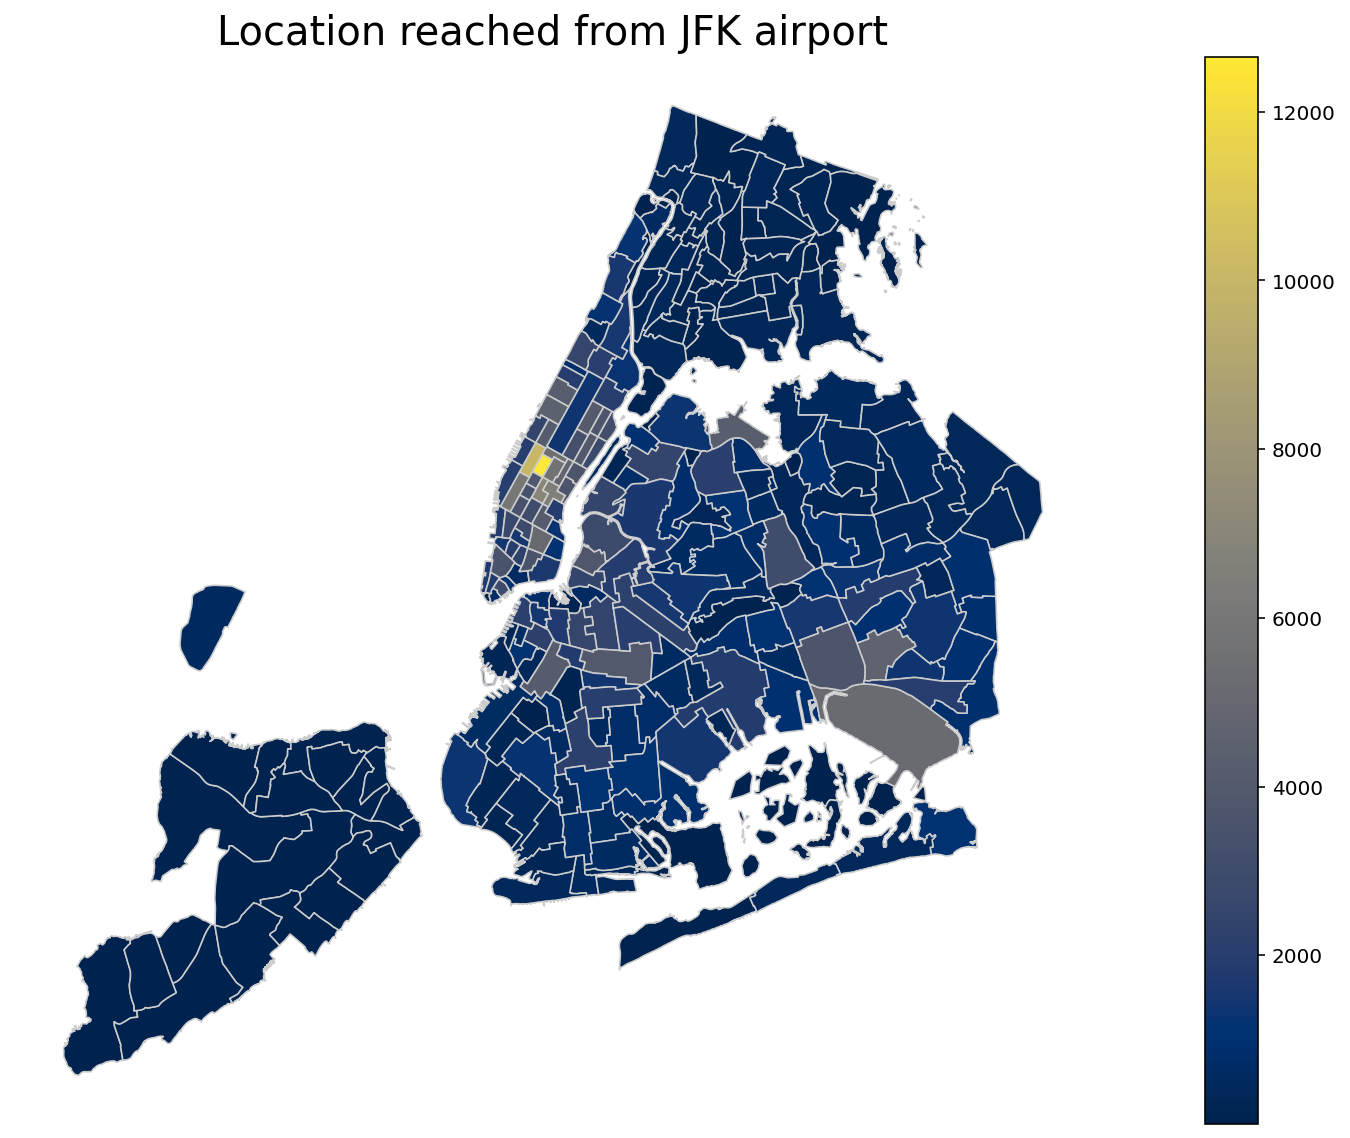

In [214]:
vmin = df_PU_JFK['count'].min()
vmax = df_PU_JFK['count'].max()

fig, ax = plt.subplots(figsize=(16,8))
ax = df_PU_JFK.plot(column="count", cmap='cividis', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')
ax.set_title(f'Location reached from JFK airport', fontdict={'fontsize': '20'})

sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.tight_layout()

### LaGuardia Airport (LGA)

In [34]:
df_PU_LGA = df_airports[df_airports.PULocation_Zone == "LaGuardia Airport"]
df_PU_LGA = df_PU_LGA.DOLocationID.value_counts().sort_values(ascending=False)
df_PU_LGA = df_PU_LGA.reset_index()
df_PU_LGA.rename(columns={'index': 'LocationID', 'DOLocationID': 'count'}, inplace=True)
df_PU_LGA = map_df.merge(df_PU_LGA, left_on="LocationID", right_on="LocationID")

In [225]:
df_PU_LGA

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2           4    0.043567    0.000112            Alphabet City           4   
3           5    0.092146    0.000498            Arden Heights           5   
4           6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
..        ...         ...         ...                      ...         ...   
249       259    0.126750    0.000395       Woodlawn/Wakefield         259   
250       260    0.133514    0.000422                 Woodside         260   
251       261    0.027120    0.000034       World Trade Center         261   
252       262    0.049064    0.000122           Yorkville East         262   
253       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  count  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...    218  
1            Bronx  POLYGON ((1026308.770 256767.698, 1026495.593 ...    113  
2        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...    683  
3    Staten Island  POLYGON ((935843.310 144283.336, 936046.565 14...      4  
4    Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...      8  
..             ...                                                ...    ...  
249          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...    146  
250         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...    922  
251      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   1351  
252      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   3561  
253      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   4189  

[254 rows x 8 columns]

In [35]:
df_PU_LGA.sort_values(by='count', ascending=False)[['zone', 'borough', 'count']]

zone        borough  count
220  Times Sq/Theatre District      Manhattan  10833
153             Midtown Center      Manhattan   6137
46                Clinton East      Manhattan   6055
154               Midtown East      Manhattan   5016
162                Murray Hill      Manhattan   4928
..                         ...            ...    ...
235              West Brighton  Staten Island      4
103        Green-Wood Cemetery       Brooklyn      3
42      Charleston/Tottenville  Staten Island      2
179              Port Richmond  Staten Island      1
168                    Oakwood  Staten Island      1

[254 rows x 3 columns]

In [37]:
df_PU_LGA[df_PU_LGA.borough == 'Queens'].sort_values('count', ascending=False)

OBJECTID  Shape_Leng  Shape_Area                                 zone  \
124       132    0.245479    0.002038                          JFK Airport   
5           7    0.107417    0.000390                              Astoria   
121       129    0.093273    0.000474                      Jackson Heights   
213       223    0.166022    0.000764                             Steinway   
137       145    0.114314    0.000347       Long Island City/Hunters Point   
..        ...         ...         ...                                  ...   
6           8    0.027591    0.000027                         Astoria Park   
109       117    0.169886    0.000904                      Hammels/Arverne   
93         96    0.185180    0.000548            Forest Park/Highland Park   
25         27    0.202509    0.001341  Breezy Point/Fort Tilden/Riis Beach   
28         30    0.094510    0.000146                        Broad Channel   

     LocationID borough                                           geometry  \
124         132  Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
5             7  Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   
121         129  Queens  POLYGON ((1018636.131 218394.393, 1018728.470 ...   
213         223  Queens  POLYGON ((1010142.087 227174.978, 1011245.342 ...   
137         145  Queens  POLYGON ((999916.846 213275.139, 1000066.513 2...   
..          ...     ...                                                ...   
6             8  Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...   
109         117  Queens  POLYGON ((1046345.484 161469.718, 1046371.327 ...   
93           96  Queens  POLYGON ((1029152.314 197379.274, 1029238.052 ...   
25           27  Queens  POLYGON ((1021692.969 147138.664, 1021883.624 ...   
28           30  Queens  POLYGON ((1034013.272 163473.152, 1034866.459 ...   

     count  
124   3007  
5     2672  
121   2234  
213   1941  
137   1896  
..     ...  
6       27  
109     25  
93      23  
25      13  
28       4  

[68 rows x 8 columns]

In [36]:
df_PU_LGA[df_PU_LGA.borough == 'Brooklyn'].sort_values('count', ascending=False)

OBJECTID  Shape_Leng  Shape_Area                             zone  \
173       181    0.089537    0.000307                       Park Slope   
245       255    0.062384    0.000172        Williamsburg (North Side)   
104       112    0.107268    0.000462                       Greenpoint   
23         25    0.047146    0.000124                      Boerum Hill   
31         33    0.053270    0.000147                 Brooklyn Heights   
..        ...         ...         ...                              ...   
142       150    0.089331    0.000333                  Manhattan Beach   
212       222    0.048389    0.000130                    Starrett City   
9          11    0.079211    0.000265                       Bath Beach   
146       154    0.227332    0.001790  Marine Park/Floyd Bennett Field   
103       111    0.059931    0.000209              Green-Wood Cemetery   

     LocationID   borough                                           geometry  \
173         181  Brooklyn  POLYGON ((990954.947 181851.707, 990815.590 18...   
245         255  Brooklyn  POLYGON ((994849.011 203499.267, 994911.093 20...   
104         112  Brooklyn  MULTIPOLYGON (((996887.819 208559.340, 996918....   
23           25  Brooklyn  POLYGON ((989365.837 190351.505, 989514.254 19...   
31           33  Brooklyn  POLYGON ((985305.756 195535.755, 985598.005 19...   
..          ...       ...                                                ...   
142         150  Brooklyn  POLYGON ((1003640.121 152446.610, 1003666.571 ...   
212         222  Brooklyn  MULTIPOLYGON (((1017802.396 176185.702, 101798...   
9            11  Brooklyn  POLYGON ((983945.076 158978.174, 984160.158 15...   
146         154  Brooklyn  MULTIPOLYGON (((1002211.414 161107.153, 100251...   
103         111  Brooklyn  POLYGON ((985590.381 179611.820, 986202.162 17...   

     count  
173   2022  
245   1999  
104   1809  
23    1428  
31    1417  
..     ...  
142     30  
212     27  
9       25  
146      4  
103      3  

[61 rows x 8 columns]

In [233]:
df_PU_LGA.sort_values(by='count', ascending=False)[['zone', 'borough', 'count']].groupby(by='borough').sum().sort_values(by='count', ascending=False)

count
borough              
Manhattan      149966
Queens          34673
Brooklyn        29187
Bronx            5731
EWR               218
Staten Island     106

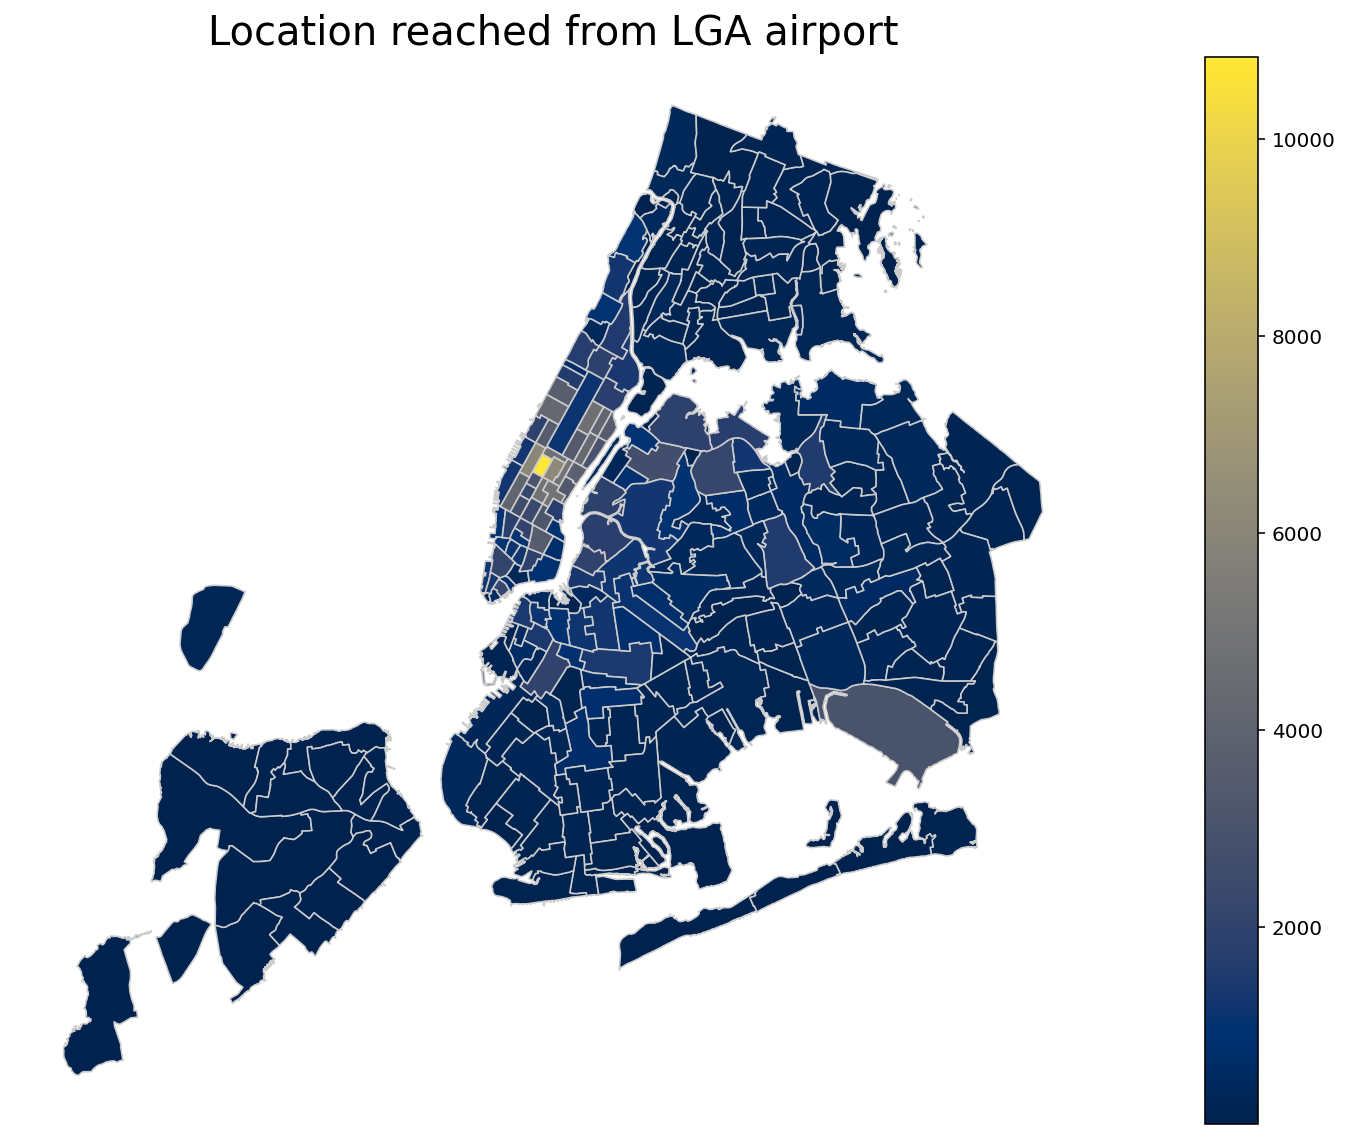

In [236]:
vmin = df_PU_LGA['count'].min()
vmax = df_PU_LGA['count'].max()

fig, ax = plt.subplots(figsize=(16,8))
ax = df_PU_LGA.plot(column="count", cmap='cividis', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')
ax.set_title(f'Location reached from LGA airport', fontdict={'fontsize': '20'})

sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.tight_layout()

## What was the busiest route?

In [2]:
df_route = pd.read_parquet("NYC_route_data.parquet")

In [304]:
df_route.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27614 entries, 0 to 27613
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PULocationID  27614 non-null  int64 
 1   DOLocationID  27614 non-null  int64 
 2   count         27614 non-null  int64 
 3   PU_Borough    27614 non-null  object
 4   PU_Zone       27514 non-null  object
 5   DO_Borough    27614 non-null  object
 6   DO_Zone       27435 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


In [46]:
df_route['count'].quantile(q=0.9)

409.0

In [47]:
df_route[df_route['count'] >= 409]['PULocationID'].unique()

array([237, 236, 264, 239, 142, 141, 161, 263, 238,  48, 140, 186, 107,
       162, 262, 163, 230, 234,  68,  79, 132, 229, 170, 143, 138, 249,
        43, 151, 164, 100, 246,  90, 137, 113, 148, 114,  75, 233, 166,
       231, 144,  74,  50,  24, 211, 158,  13, 125,  41,  87, 261,  70,
        42, 116,  88, 152, 224, 244,   7,   4, 209, 232, 226,  45, 265])

In [3]:
df_route_Manhattan = df_route[(df_route.PU_Borough == 'Manhattan') & (df_route.DO_Borough == 'Manhattan')]

In [4]:
df_route_Manhattan

PULocationID  DOLocationID  count PU_Borough                   PU_Zone  \
0               237           236  61788  Manhattan     Upper East Side South   
164             236           237  52640  Manhattan     Upper East Side North   
1               236           236  41628  Manhattan     Upper East Side North   
163             237           237  39146  Manhattan     Upper East Side South   
2016            239           238  24263  Manhattan     Upper West Side South   
...             ...           ...    ...        ...                       ...   
421             127           161      1  Manhattan                    Inwood   
16244           116            12      1  Manhattan          Hamilton Heights   
16247           244            12      1  Manhattan  Washington Heights South   
16248             4            12      1  Manhattan             Alphabet City   
16253            12            12      1  Manhattan              Battery Park   

      DO_Borough                DO_Zone  
0      Manhattan  Upper East Side North  
164    Manhattan  Upper East Side South  
1      Manhattan  Upper East Side North  
163    Manhattan  Upper East Side South  
2016   Manhattan  Upper West Side North  
...          ...                    ...  
421    Manhattan         Midtown Center  
16244  Manhattan           Battery Park  
16247  Manhattan           Battery Park  
16248  Manhattan           Battery Park  
16253  Manhattan           Battery Park  

[4040 rows x 7 columns]

In [48]:
df_route_Manhattan['count'].quantile(q=0.8)

2802.400000000002

In [51]:
df_route_Manhattan[df_route_Manhattan['count'] >= 2802]['PULocationID'].unique()

array([237, 236, 239, 142, 141, 161, 263, 238,  48, 140, 186, 107, 162,
       262, 163, 230, 234,  68,  79, 229, 170, 143, 249,  43, 151, 164,
       100, 246,  90, 137, 113, 148, 114,  75, 233, 166, 231, 144,  74,
        50,  24, 211, 158,  13])

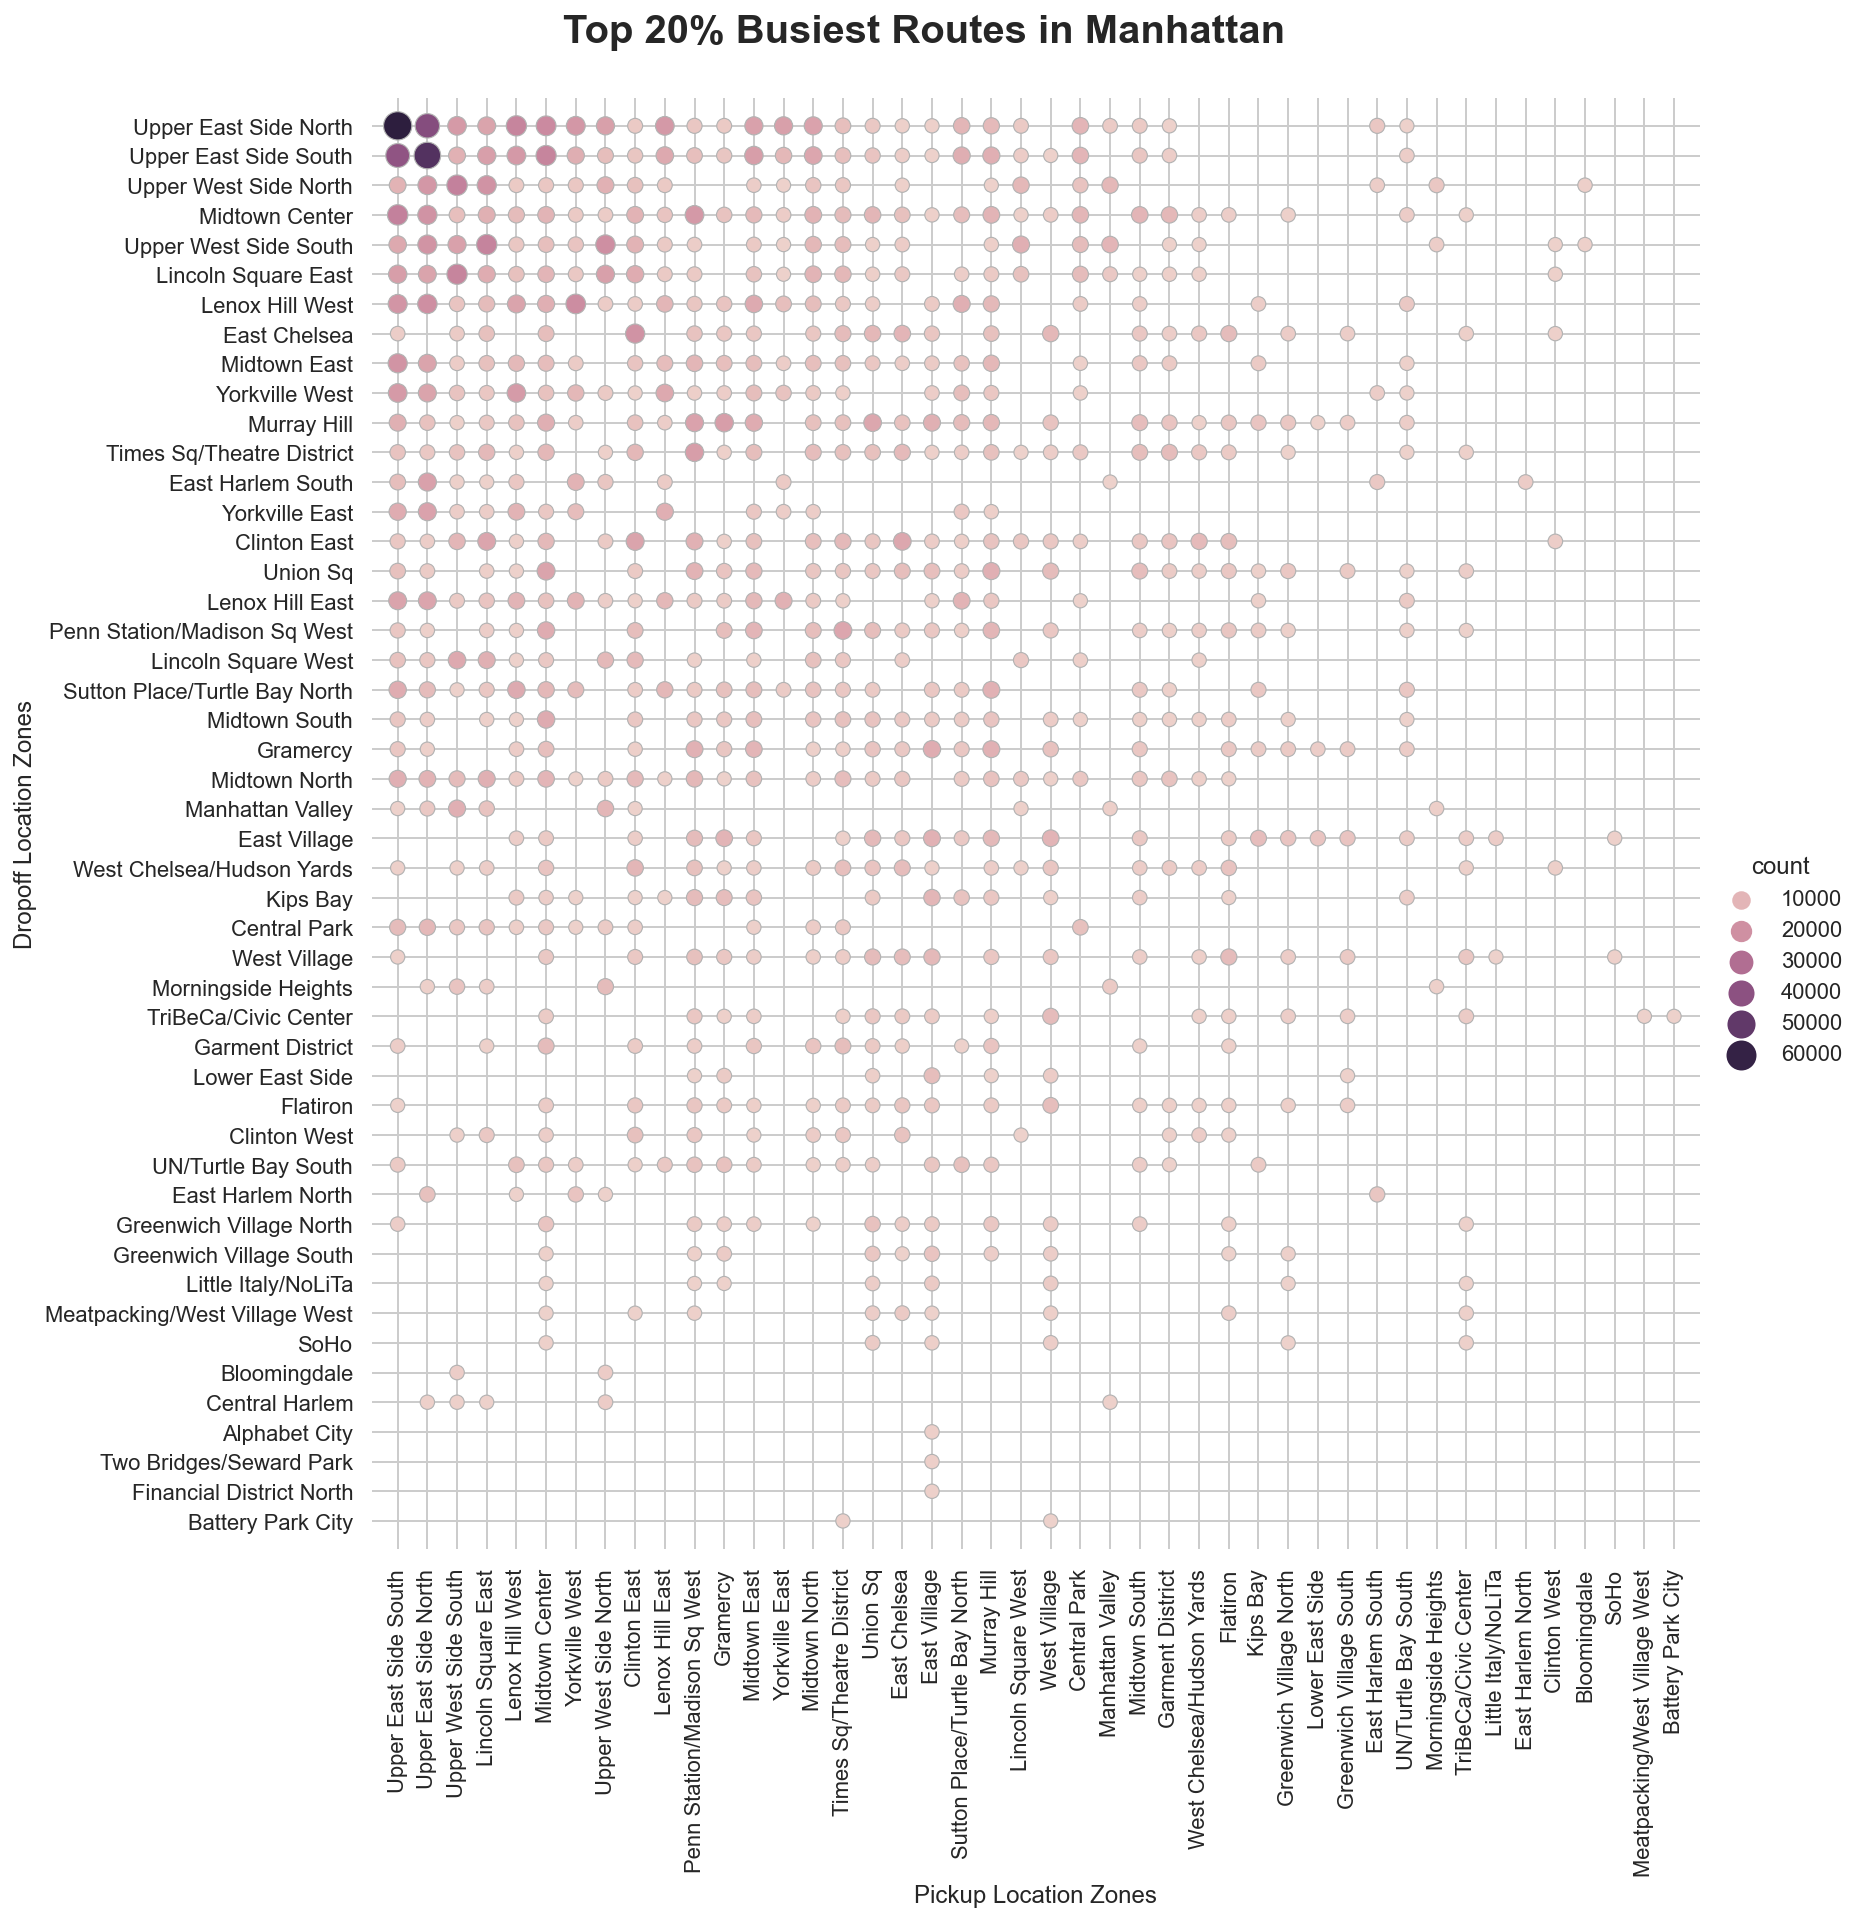

In [35]:
sns.set_theme(style="whitegrid")

q80 = df_route_Manhattan['count'].quantile(q=0.8)

g = sns.relplot(
    data=df_route_Manhattan[df_route_Manhattan['count'] >= q80], 
    x='PU_Zone', y='DO_Zone', 
    hue='count', size='count', height=12, sizes=(50, 200), edgecolor=".7")


g.set(xlabel="Pickup Location Zones", ylabel="Dropoff Location Zones", 
        aspect="equal")
g.fig.suptitle("Top 20% Busiest Routes in Manhattan", fontsize=20, weight='bold')

for label in g.ax.get_xticklabels():
    label.set_rotation(90)

g.despine(left=True, bottom=True)
g.ax.margins(.02)